# Classification of garbage photos into 6 categories  
Useful imports:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os # file handling
import cv2 #images

import matplotlib.pyplot as plt # graphs
%matplotlib inline 

from tqdm import tqdm # progress bar

## Reading files
The first step is to cycle the folders containing the images and saving them in the respective lists.  
One useful thing to do here is to resize the files in order to make them easier to work with.

In [2]:
trash = []
cardboard = []
plastic = []
metal = []
paper = []
glass = []
garbage = []

prova = []
for dirname, _, filenames in os.walk('D:/PROJECTS/AI projects/garbage-classification/Garbage classification'):
#     print(dirname)
    for filename in filenames:
        prova.append(os.path.join(dirname, filename))
# print(prova)
height = 192
width = 256

dim = (width, height)


for file in tqdm(prova):
    image = cv2.imread(file,0)
    res = cv2.resize(image, dim, interpolation = cv2.INTER_LINEAR)
    file = file.split("\\")
    
    cat = file[-2]
    if cat == 'trash':
        trash.append(res)
    if cat == 'plastic':
        plastic.append(res)
    if cat == 'glass':
        glass.append(res)
    if cat == 'paper':
        paper.append(res)
    if cat == 'metal':
        metal.append(res)
    if cat == 'cardboard':
        cardboard.append(res)

100%|██████████| 2527/2527 [00:07<00:00, 349.71it/s]


Once we have the 6 lists we create the merged dataset joining them, and we create the target columns containing the correct label for each of the images.

In [3]:
garbage = trash + plastic + glass + paper + metal + cardboard
target = ['trash' for item in trash] + ['plastic' for item in plastic]+['glass' for item in glass]+['paper' for item in paper]+['metal' for item in metal]+['cardboard' for item in cardboard]
print("Total images:",len(garbage))
print("Total labels:",len(target))

Total images: 2527
Total labels: 2527


We can now preview one of the images to see what we're working with.

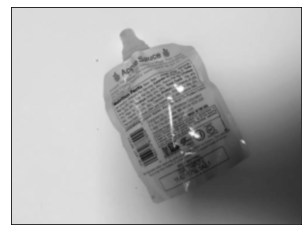

In [4]:
plt.imshow(garbage[0], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Input manipulation
The next step is to prepare the images to be fed to the prediction model, this means taking each one, that is currently represented by a matrix of pixels, and "flattening" it to an array of pixels. Each pixel contains its grayscale value.

In [5]:
for i in range(len(garbage)):
    garbage[i] = garbage[i].reshape(width*height)


In [6]:
print("tot foto:",len(garbage))
print(garbage[0])

tot foto: 2527
[219 219 219 ...  80  80  79]


We join the images with the target column into a pandas DataFrame object.

In [7]:
df = pd.DataFrame(np.matrix(garbage))
df['target'] = target
df

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,target
0,219,219,219,219,219,219,219,219,221,221,...,83,83,82,82,81,81,80,80,79,trash
1,203,203,203,203,203,203,203,203,203,203,...,75,73,74,75,75,74,74,74,74,trash
2,222,222,222,222,222,222,222,222,222,222,...,83,82,82,82,82,82,82,82,82,trash
3,211,212,213,213,214,214,213,212,212,212,...,76,76,76,76,76,76,76,75,74,trash
4,221,221,221,221,222,222,222,222,221,222,...,36,42,59,66,63,56,55,48,39,trash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,230,236,235,236,234,234,233,232,233,233,...,176,166,165,172,171,172,183,179,174,cardboard
2523,188,188,188,188,187,189,188,185,182,181,...,159,159,160,161,161,165,165,172,165,cardboard
2524,150,147,149,147,146,148,150,150,147,148,...,94,91,77,76,74,74,76,84,91,cardboard
2525,188,189,187,186,185,185,185,185,183,183,...,164,155,151,139,140,142,141,134,138,cardboard


## Shuffling the data
It is important to shuffle the input data to prevent our classfier to be trained incorrectly.

In [8]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,target
1214,255,255,255,255,255,255,255,254,254,253,...,196,196,196,196,196,196,196,195,194,paper
1652,195,195,195,195,194,195,196,196,195,196,...,160,160,160,159,158,158,158,158,158,paper
1325,255,255,255,255,255,255,255,255,255,255,...,163,164,164,164,164,165,165,164,163,paper
2083,229,228,228,227,226,226,225,224,224,224,...,207,206,207,208,208,209,210,210,209,metal
1410,240,239,239,238,238,236,235,236,235,235,...,169,157,183,208,221,224,228,229,233,paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,194,195,196,196,197,198,199,199,199,200,...,208,207,207,207,207,208,208,207,206,glass
1391,245,245,245,245,243,243,243,243,242,242,...,155,149,139,139,139,147,159,152,148,paper
1634,255,255,255,255,255,255,255,255,255,255,...,161,161,161,161,161,160,160,159,158,paper
1637,255,255,255,255,255,255,255,255,255,255,...,63,64,65,66,66,67,68,69,69,paper


## Splitting the dataset
We split the dataset into two sections, one that we'll use for training the model and the other for testing it's accuracy. Same thing is done with the 'target' column.

In [9]:
y = df["target"]
df.drop("target",1, inplace=True)

In [ ]:
x_train, x_test = df[:2000], df[2000:]
y_train, y_test = y[:2000], y[2000:]
